In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ejlok1/toronto-emotional-speech-set-tess")

print("Path to dataset files:", path)

100%|██████████| 428M/428M [00:11<00:00, 38.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1


In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

LOAD THE DATASETS

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1'):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    label = filename.split('_')[-1]
    label = label.split('.')[0]
    labels.append(label.lower())
print('Dataset is loaded')

Dataset is loaded


In [ ]:
paths[:5]

['/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/YAF_happy/YAF_neat_happy.wav',
 '/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/YAF_happy/YAF_bar_happy.wav',
 '/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/YAF_happy/YAF_bone_happy.wav',
 '/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/YAF_happy/YAF_haze_happy.wav',
 '/root/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1/TESS Toronto emotional speech set data/YAF_happy/YAF_mood_happy.wav']

In [ ]:
labels[:5]

['happy', 'happy', 'happy', 'happy', 'happy']

CREATE THE DATAFRAME

In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/root/.cache/kagglehub/datasets/ejlok1/toronto...,happy
1,/root/.cache/kagglehub/datasets/ejlok1/toronto...,happy
2,/root/.cache/kagglehub/datasets/ejlok1/toronto...,happy
3,/root/.cache/kagglehub/datasets/ejlok1/toronto...,happy
4,/root/.cache/kagglehub/datasets/ejlok1/toronto...,happy


In [ ]:
df['label'].value_counts()

,count
label,
happy,800
disgust,800
angry,800
sad,800
ps,800
neutral,800
fear,800


EXPLORATORY DATA ANALYSIS

<Axes: xlabel='count', ylabel='label'>

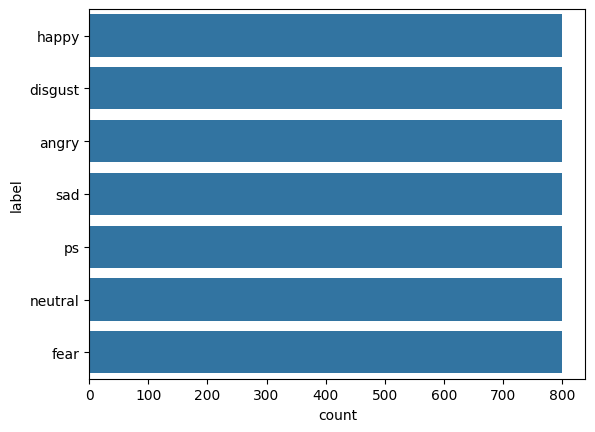

In [ ]:
sns.countplot(df['label'])

In [ ]:
def waveplot(data, sr, emotion):
  plt.figure(figsize=(10,4))
  plt.title(emotion, size=20)
  librosa.display.waveshow(data, sr=sr)  # Replaced waveplot with waveshow
  plt.xlabel("Time (s)")
  plt.ylabel("Amplitude")
  plt.show()

def spectogram(data, sr, emotion):
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(10,4))
  plt.title(emotion, size=20)
  librosa.display.specshow(xdb, sr=sr, x_axis = 'time', y_axis = 'hz')
  plt.colorbar()

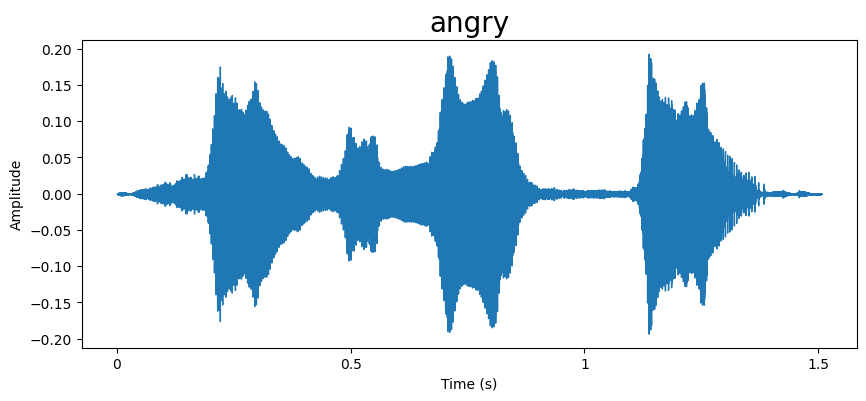

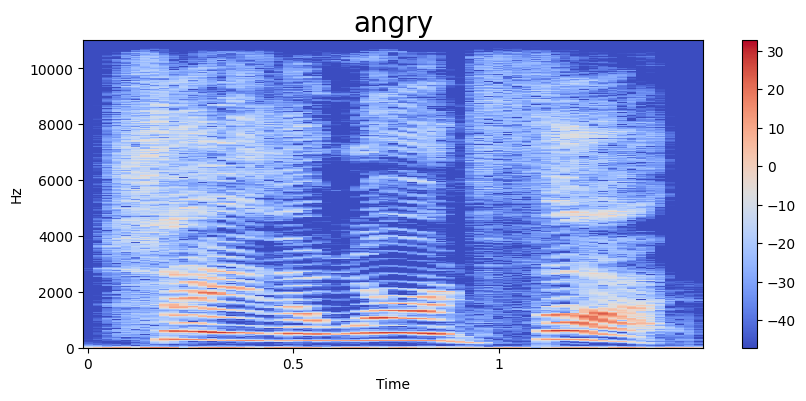

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate =librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

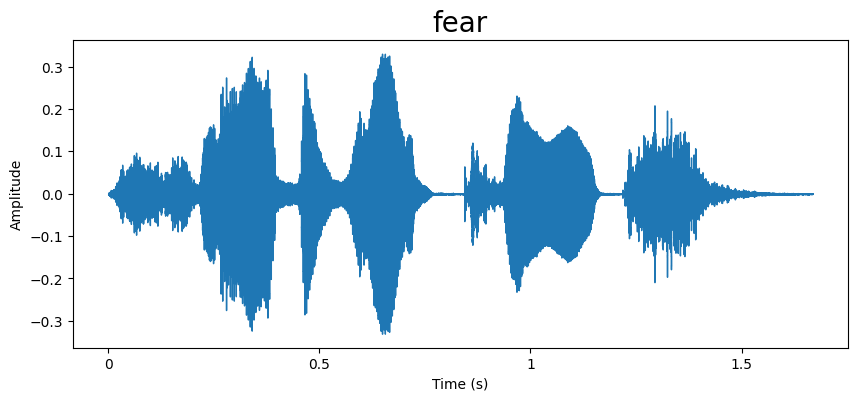

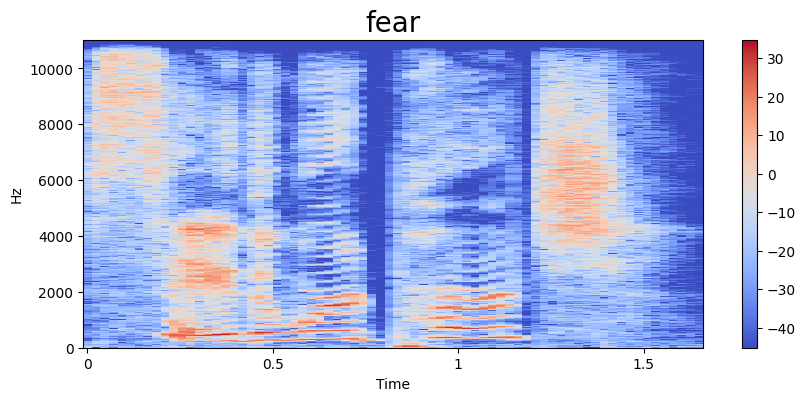

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate =librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

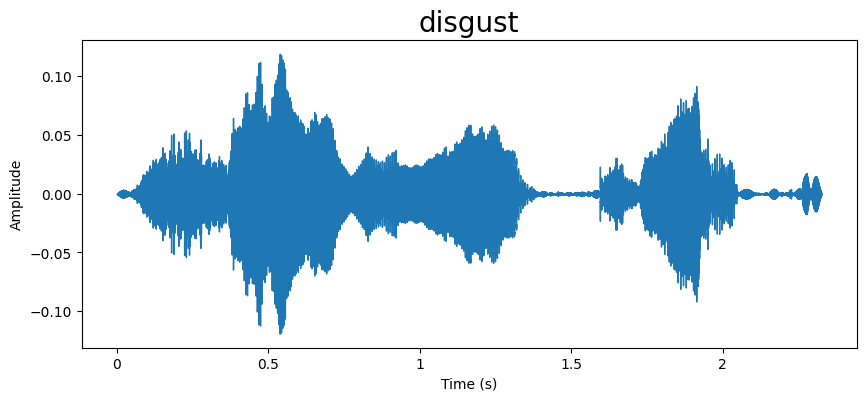

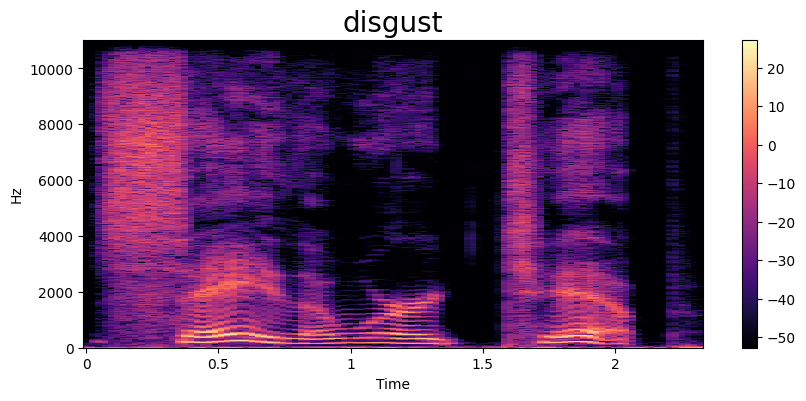

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate =librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

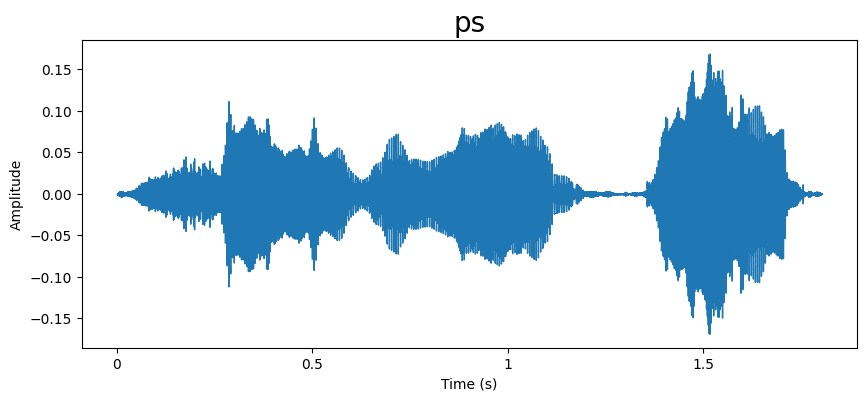

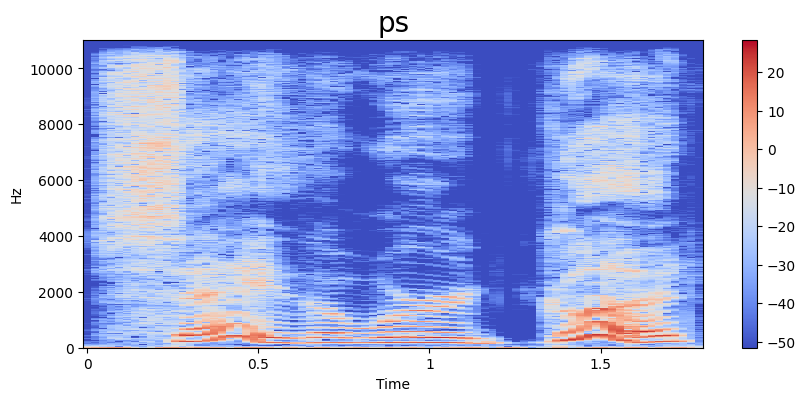

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate =librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

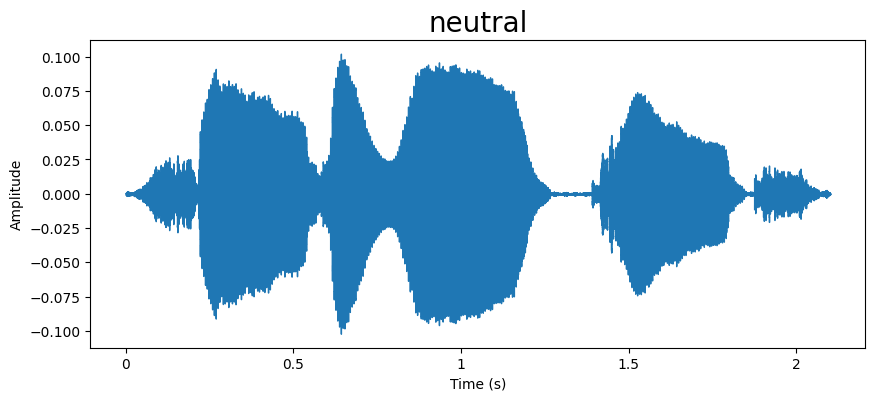

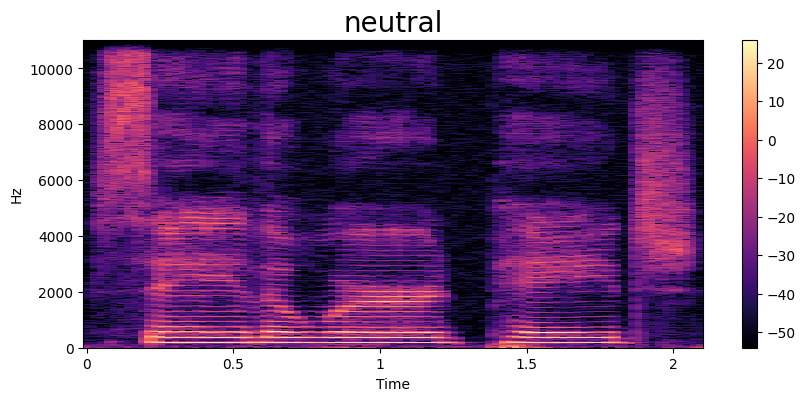

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate =librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

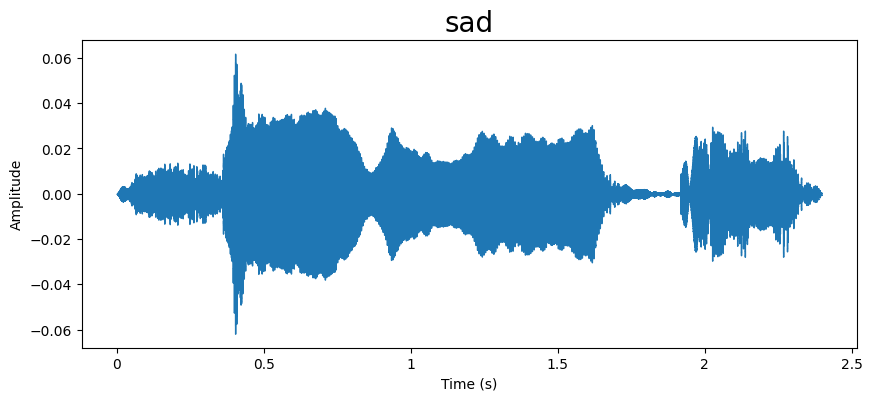

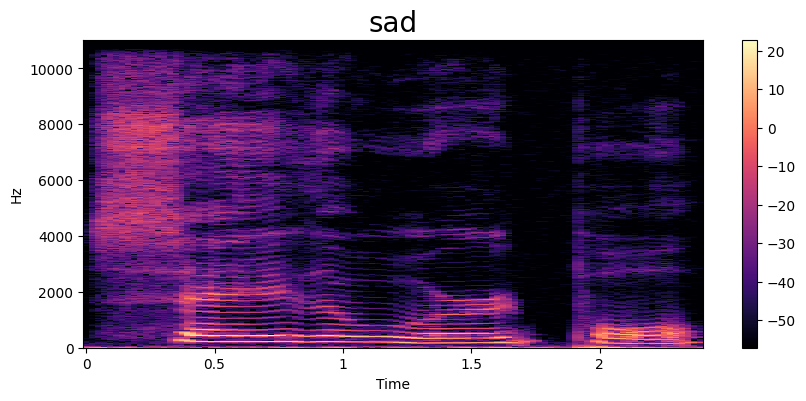

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate =librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

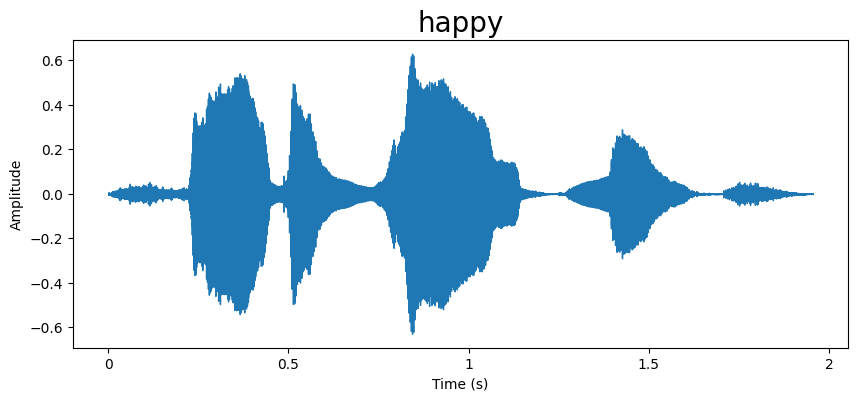

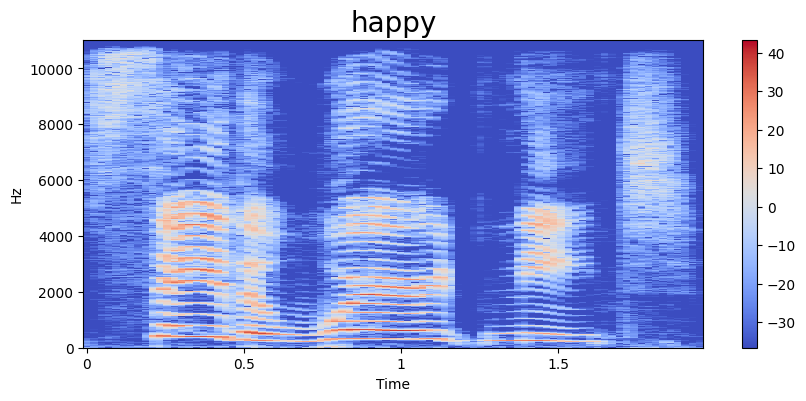

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate =librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

EXTRACTING FEATURE

In [ ]:
def extract_mfcc(filename):
  y, sr = librosa.load(filename,  duration = 3, offset = 0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-3.48911285e+02,  3.23623009e+01, -2.47403979e+00,  3.79664116e+01,
       -7.38546419e+00, -6.10373211e+00, -3.91559482e+00, -1.68291607e+01,
        2.77537107e-01, -1.11434040e+01, -8.75811481e+00,  1.51420393e+01,
       -1.74132710e+01,  7.68884039e+00, -5.39678574e+00, -6.63643885e+00,
       -1.43357456e+00, -9.27391624e+00, -1.40533619e+01,  2.92286366e-01,
       -1.08183134e+00,  8.72948837e+00,  6.03269291e+00,  1.13741865e+01,
        1.44614577e+00,  4.68144083e+00,  4.56571341e+00,  1.25435925e+01,
        1.73668575e+01,  1.15068026e+01,  1.63365647e-01, -1.37432325e+00,
        5.65911233e-01,  5.34848738e+00, -1.66665137e+00, -5.76727867e+00,
       -4.68314791e+00, -1.22518611e+00, -8.83565962e-01, -4.51409912e+00],
      dtype=float32)

In [ ]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
x_mfcc

,speech
0,"[-348.9113, 32.3623, -2.4740398, 37.96641, -7...."
1,"[-290.17346, 72.863945, -38.194107, 6.177735, ..."
2,"[-326.12833, 69.966286, -14.238354, 20.211922,..."
3,"[-336.9496, 29.371023, -10.65343, 42.07175, -0..."
4,"[-302.61328, 46.906944, -17.935892, 37.19776, ..."
...,...
5595,"[-320.14484, 69.09315, -7.660959, 1.5329081, -..."
5596,"[-354.0923, 19.060642, -0.9335648, 16.293133, ..."
5597,"[-328.93008, 34.512203, -4.381163, 15.994027, ..."
5598,"[-341.188, 73.13564, -23.564163, 14.904688, -2..."


In [ ]:
X = [x for x in x_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [ ]:
##input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y


<5600x7 sparse matrix of type '<class 'numpy.float64'>'
	with 5600 stored elements in Compressed Sparse Row format>

In [ ]:
y = y.toarray()

In [ ]:
y


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y.shape

(5600, 7)

CREATE THE LSTM MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 123)                 │          61,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
##TRAIN THE MODEL
history = model.fit(X, y, validation_split= 0.2, epochs = 100, batch_size=512, shuffle=True)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 499ms/step - accuracy: 0.2844 - loss: 1.8638 - val_accuracy: 0.2750 - val_loss: 1.8178
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 285ms/step - accuracy: 0.4464 - loss: 1.5669 - val_accuracy: 0.3045 - val_loss: 1.5749
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 284ms/step - accuracy: 0.5569 - loss: 1.2140 - val_accuracy: 0.5455 - val_loss: 1.1391
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.6512 - loss: 0.9283 - val_accuracy: 0.6455 - val_loss: 0.8748
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 374ms/step - accuracy: 0.7055 - loss: 0.7551 - val_accuracy: 0.5830 - val_loss: 0.7588
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 398ms/step - accuracy: 0.7790 - loss: 0.6022 - val_accuracy: 0.7125 - val_loss: 0.6088
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step - accuracy: 0.8373 - loss: 0.4530 - val_accuracy: 0.7955 - val_loss: 0.4364
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - accuracy: 0.8929 - loss: 0.3324 - val_accuracy: 0.8250 - v

PLOT THE RESULT

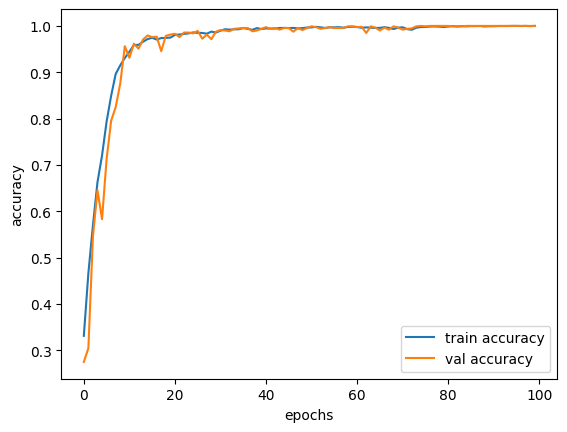

In [ ]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

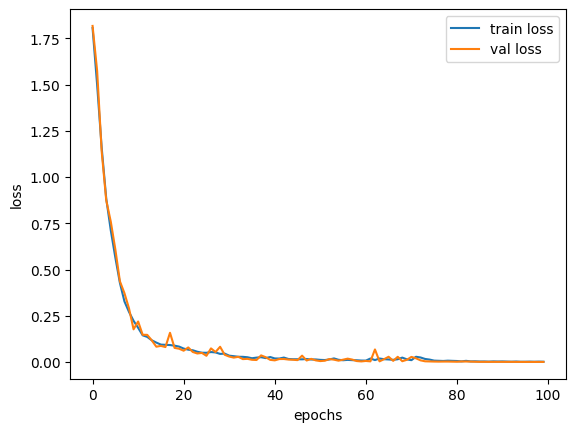

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Random forest, CNN,